
# A CNN on Intel Image Classification dataset

I created a convolutional neural network and after training it on the Image dataset provided by Intel. I tried to build a model using all the data, and I got 77 accuracy score. However there are two classes in the data called "buildings" and "stree" that have a lot in common and in some cases, it's hard even for me to say which is which. This comes from the fact that most streets also contain buildings.
Just to see how good the model performs without this problem, I omitted the "street" category and the results improved by 6 percent.

This model is far from complete and in my next step I will try to find a solution so that the model can distinguish between the above discussed categories.



**Data available at [kaggle](https://www.kaggle.com/puneet6060/intel-image-classification/download)**


P.S. 
The same problem goes between images containing sky, and the "sea" category, and a few more of these. 


In [0]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, MaxPooling2D, Conv2D, Dropout

In [0]:
from sklearn.metrics import confusion_matrix
from collections import Counter

In [0]:
!wget "https://storage.googleapis.com/kaggle-data-sets/111880%2F269359%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591358704&Signature=UUuIR5f6j%2BeTubhDTAzAPAPHTcLxK0NlbbU3NUQ2zQP9VHJWILJcqiYxSOxp0LZQRDsergwBH3UrX%2B6E3%2FTE6bf34oSUyPMoLOVtl1Yk9dmbt4cbmMkfWrEV%2FMtUPRTz91IB2WARQ1L1pX8HQSUULsddUG6%2BMXXvW%2FNNG8uVH9bAfMbEnEOYtLaNFwj%2F2PzFyIdBHKE7XjJk3a8hVB1upGArFUemt0Cl9Q9XbKyv7ZxfhiZKyG6plmQIAzQig7DnRsELL%2FCh%2FWV8N5RKoOWxLMGJjP2H43ZJiNGlaNT5cWTHHefC30B%2FFZu24NNzurTm45JZfYu7b7xUu3E8Zex%2B1Q%3D%3D"

In [0]:
!unzip iic.zip

# A glance on the data

In [0]:
img = mpimg.imread("seg_train/seg_train/forest/10007.jpg")

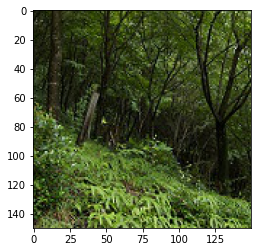

In [5]:
plt.imshow(img)

# Loading the data from the downloaded file
note:
I tried to build a model using all the data, and I got 77 accuracy score. There are two classes in the data called "buildings" and "stree" that have a lot in common and in some cases, it's hard even for me to say which is which :)

Just to see how good the model performs without this problem, I omitted the "street" category and the results improved by 6 percent.

In [0]:
classes = "mountain glacier buildings sea forest".split(" ") #street is removed temporarily
class_labels = {class_name:i for i, class_name in enumerate(classes)}

In [0]:
total_classes = len(classes)
image_size = (150, 150)

In [0]:
# this code is borrowed. I unfortunately don't remember from whom. :(
# message me if it's yours to get the credit.
def load_data():
  datasets = ["/content/seg_train/seg_train", "/content/seg_test/seg_test"]
  output = []

  for dataset in datasets:
    images = []
    labels = []

    print(f"loading {dataset}")

    for folder in os.listdir(dataset):
      if folder == "street":
        continue

      label = class_labels[folder]

      #tqdm is just to produce a progress bar, not essential.
      for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        img_path = os.path.join(os.path.join(dataset, folder), file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, image_size)
        
        images.append(image)
        labels.append(label)
    
    images = np.array(images, dtype="float32")
    labels = np.array(labels, dtype="int32")

    output.append((images, labels))
  
  return output

In [33]:
(X_train, y_train), (X_test, y_test) = load_data()

  8%|▊         | 165/2191 [00:00<00:01, 1644.40it/s]

loading /content/seg_train/seg_train


 36%|███▌      | 157/437 [00:00<00:00, 1564.78it/s]

loading /content/seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 1776.30it/s]


In [0]:
input_shape = X_train[0].shape

In [0]:
# to normalize:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
model = Sequential([
  Input(shape=input_shape),
  Conv2D(32, (3,3), activation="relu", padding="same"),
  MaxPooling2D((2,2), padding="same"),
  Conv2D(64, (3,3), activation="relu", padding="same"),
  MaxPooling2D((2,2), padding="same"),
  Conv2D(128, (3,3), activation="relu", padding="same"),
  MaxPooling2D((2,2), padding="same"),

  Flatten(),

  Dense(64, activation="relu"),
  Dropout(0.15),
  Dense(128, activation="relu"),
  Dropout(0.15),
  Dense(128, activation="relu"),
  
  Dense(total_classes, activation="softmax")                  
])

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 46208)            

In [40]:
model.fit(X_train, y_train, batch_size=30, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
389/389 [==============================] - 516s 1s/step - loss: 0.9997 - accuracy: 0.5877 - val_loss: 0.8061 - val_accuracy: 0.6467
Epoch 2/30
389/389 [==============================] - 513s 1s/step - loss: 0.7181 - accuracy: 0.7209 - val_loss: 0.6012 - val_accuracy: 0.7863
Epoch 3/30
389/389 [==============================] - 504s 1s/step - loss: 0.5380 - accuracy: 0.8042 - val_loss: 0.5436 - val_accuracy: 0.8059
Epoch 4/30
389/389 [==============================] - 502s 1s/step - loss: 0.4250 - accuracy: 0.8520 - val_loss: 0.4499 - val_accuracy: 0.8511
Epoch 5/30
389/389 [==============================] - 509s 1s/step - loss: 0.3418 - accuracy: 0.8796 - val_loss: 0.4878 - val_accuracy: 0.8391
Epoch 6/30
389/389 [==============================] - 514s 1s/step - loss: 0.2715 - accuracy: 0.9049 - val_loss: 0.4811 - val_accuracy: 0.8523
Epoch 7/30
389/389 [==============================] - 519s 1s/step - loss: 0.2306 - accuracy: 0.9229 - val_loss: 0.5733 - val_accuracy: 0.8383

In [55]:
preds = np.argmax(model.predict(X_test), axis=-1)

array([ True,  True,  True, ...,  True,  True,  True])

In [0]:
mistakes = [(i,j) for i, j in zip(y_test, preds) if i != j]
common_mistakes = Counter(mistakes).most_common(10)

In [0]:
label_to_name = {}
for i, j in class_labels.items():
  label_to_name[j] = i

In [62]:
for mistake, count in common_mistakes:
  print(f"True label: {label_to_name[mistake[0]]}\t, Predicted: {label_to_name[mistake[1]]}\t, Count: {count}")

True label: glacier	, Predicted: mountain	, Count: 87
True label: mountain	, Predicted: glacier	, Count: 69
True label: sea	, Predicted: mountain	, Count: 44
True label: glacier	, Predicted: sea	, Count: 41
True label: sea	, Predicted: glacier	, Count: 41
True label: mountain	, Predicted: sea	, Count: 33
True label: mountain	, Predicted: buildings	, Count: 17
True label: sea	, Predicted: buildings	, Count: 16
True label: buildings	, Predicted: sea	, Count: 15
True label: buildings	, Predicted: forest	, Count: 14
